In [2]:
#将上述LMS算法改为使用小批量数据训练。观察并对比收敛速度
import itertools
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [3]:
#模型
def model(X, W, b):
    X = np.array(X)
    
    return np.sum(X * W) + b

In [5]:
#生成数据集
num_train = 1000
num_test = 100
# 制作数据集
data = make_regression(n_samples=num_train, n_features=2)

# 将数据集分割成为训练集与测试集
# 并将数据集转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]

In [6]:
def mini(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

Text(0,0.5,'losses')

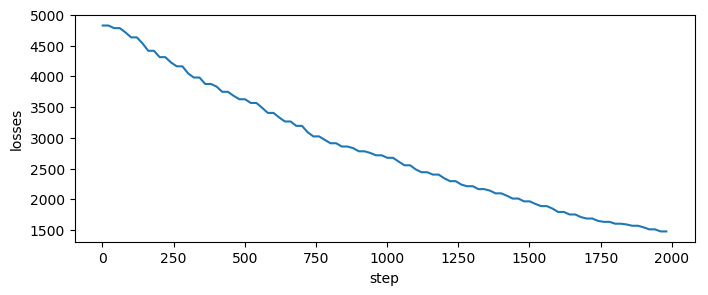

In [7]:
#每32次更新一次小循环
#或者使用矩阵
train_steps = 2000    # 训练次数
lr =0.01                    # 学习率
summary_step = 20   # 摘要频率 
summary = []            # 摘要
tmp_grad_w = 0
tmp_grad_b = 0

W = np.random.randn(2)  # 初始化连接权重
b = 0                             # 初始化偏置值
for i in range(train_steps):

    # 摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))
    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    # 计算偏导数并更新模型参数
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    tmp_grad_w += dW
    tmp_grad_b += db
    
    if i % 32 == 31:
        W = W - lr * tmp_grad_w / 32
        b = b - lr * tmp_grad_b / 32
        
        tmp_grad_w = 0
        tmp_grad_b = 0

# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')